<a href="https://colab.research.google.com/github/gabrielcgo/modulo03_BLUE/blob/main/projeto04_modulo3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 04** / *Módulo Extra*

Essa análise é uma atividade proposta pela Blue EdTech com o objetivo de aplicação prática dos conteúdos ensinados para obtenção parcial da nota (40%) do módulo Extra.

A atividade é composta por 3 questões práticas que serão resolvidas ao decorrer desta apresentação.


Os principais pontos que serão avaliados:
*   Levantamento de hipóteses
*   Manipulação de dados e criação de gráficos com o Pandas
*   Desenvolvimento de um sistema de recomendação

# Import modules

*   Para carregar o Dataset, ultilizamos o Pandas
*   O Numpy para trabalhar com arrays
*   O Seaborn para visualizar gráficos
*   SpaCy (já citado) para trabalhar com processamento de linguagem
*   Sklearn para estatística e Machine Learning
*   Collections para realizar contagem de Tokens

In [ ]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Análise exploratória: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.

In [ ]:
# Carregando o dataset

df  = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [ ]:
# Vamos obter algumas informações sobre como estão as entradas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Temos muitos valores faltantes, mas é notável que algumas variáveis não são importantes e podem ser removidas, como o nome e o Twitter do avaliador. Além disso, a especificidade da região 2 tem muitos valores faltantes, o que não justifica manter essa variável.

In [ ]:
# Removendo as colunas não necessárias.

df = df.drop(['region_2', 'taster_name', 'taster_twitter_handle'], axis=1)

In [ ]:
# Removendo as entradas com falores faltantes

df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 3 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70175 non-null  int64  
 1   country      70175 non-null  object 
 2   description  70175 non-null  object 
 3   designation  70175 non-null  object 
 4   points       70175 non-null  int64  
 5   price        70175 non-null  float64
 6   province     70175 non-null  object 
 7   region_1     70175 non-null  object 
 8   title        70175 non-null  object 
 9   variety      70175 non-null  object 
 10  winery       70175 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.4+ MB


Agora o dataset está completo, sem valores faltantes e colunas que não agregarão na análise. 

Ao total sobraram 70.175 linhas das 130.000 originais.

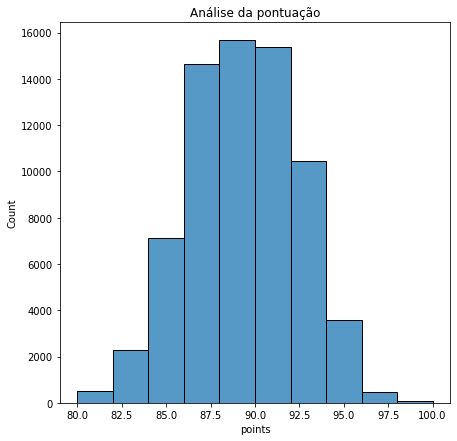

In [ ]:
# Vamos visualizar a pontuação dada nos vinhos.

plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Análise da pontuação') # Título
sns.histplot(data=df, x ='points', bins=10)

In [ ]:
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Análise da pontuação') # Título
sns.histplot(data=df, x ='points', y='', bins=10)

In [ ]:
# calcularemos a media das avaliacoes por filme
media_avaliacoes = avaliacoes.groupby('movieId')['rating'].mean().reset_index().rename({'rating':'rating_average'}, axis = 1)

# contabilizamos o total de avaliacoes por filme
contagem_avaliacoes = avaliacoes.groupby('movieId')['rating'].count().reset_index().rename({'rating':'rating_count'}, axis = 1)

# juntamos as estatisticas em um dataframe unico
avaliacoes_estatisticas = media_avaliacoes.merge(contagem_avaliacoes, how = 'inner', on = 'movieId')

avaliacao_media_total  = avaliacoes_estatisticas['rating_average'].mean()

avaliacao_minima_total = avaliacoes_estatisticas['rating_count'].quantile(0.90)

def avaliacao_pesos(estatisticas, avaliacao_minima=0, avaliacao_media=0):
    
    v = estatisticas['rating_count']
    R = estatisticas['rating_average']
    C = avaliacao_media
    m = avaliacao_minima
    
    # formula IMDb
    return (v/(v+m) * R) + (m/(m+v) * C)

avaliacoes_estatisticas['weight'] = avaliacao_pesos(avaliacoes_estatisticas, 
                                                   avaliacao_media=avaliacao_media_total, 
                                                   avaliacao_minima = avaliacao_minima_total)

# juntamos as estatisticas geradas com os metadados
dados = metadados.merge(avaliacoes_estatisticas, how = 'inner', on = 'movieId')
dados = dados.sort_values('weight', ascending = False)

#2. Sistema de recomendação: faça a construção de seu sistema de recomendação

In [ ]:
def recomendacoes(titulo):
    
    busca = []
    for title in dados.title:
        hit = re.findall(titulo, title)
        if hit:
            idx = np.where(dados.title == title)[0][0]
            if idx < 10:
                busca.append(dados.iloc[0:10,1:3])
            else:
                busca.append(dados.iloc[idx - 10:idx,1:3])
                
    return busca

# 3. Relatório: construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:
*   Imagine que você possui uma startup e este é o primeiro relatório apresentará
*   Coloque o nome do seu produto
*   Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
*   Coloque gráficos e frases para sustentar seus argumentos
*   Mostre as soluções do mercado
*   Escreva sobre a sua solução e por que ela é a melhor